# Summary note

In [8]:
# Import all functions needed

from IPython.display import Image
import pandas as pd


## Find relative dataset
Find relative dataset, such as rental prices, public transportation, school location, income, and population. The reason that we need to find datasets for public transportation and school is these features are most relative to the livability of suburbs. The previous rental prices are the y train of the prediction model. Income and population are the features which we think are relative to the rental prices of real estate.

## Scrap data
Information for each houses need to be scraped from Domain.com. We have scrapped 15,000 instances of information for houses. The determined features are Longitude, Latitude, Price per week, property type, house area, room number, postcode, and house price increase rate.





## Use API find distance
Considering that the Open route Service API is used to find the nearest school or metro station in the area of the house, the requests amount required from the api are limited, making it a very slow efficiency to obtain the data. Using the geo-location formula, the closest school or metro station is calculated directly from the coordinates which is based on the linear distance. The api is then requested to obtain the real distance needed to drive and the estimated road usage time.

Through this methods, could reduce the time used and reduce unnecessary expenditure on api usage to save the money.




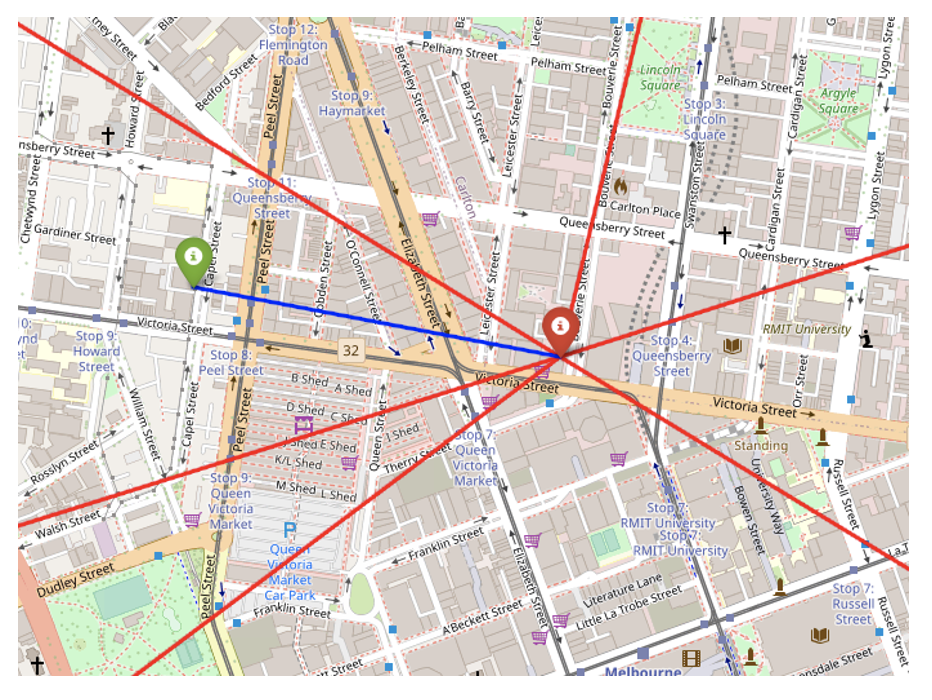

In [9]:
# For instance :
# Find the nearest school

Image(filename='../plots/foliumMap_SchoolAPIPresentation_1.png')

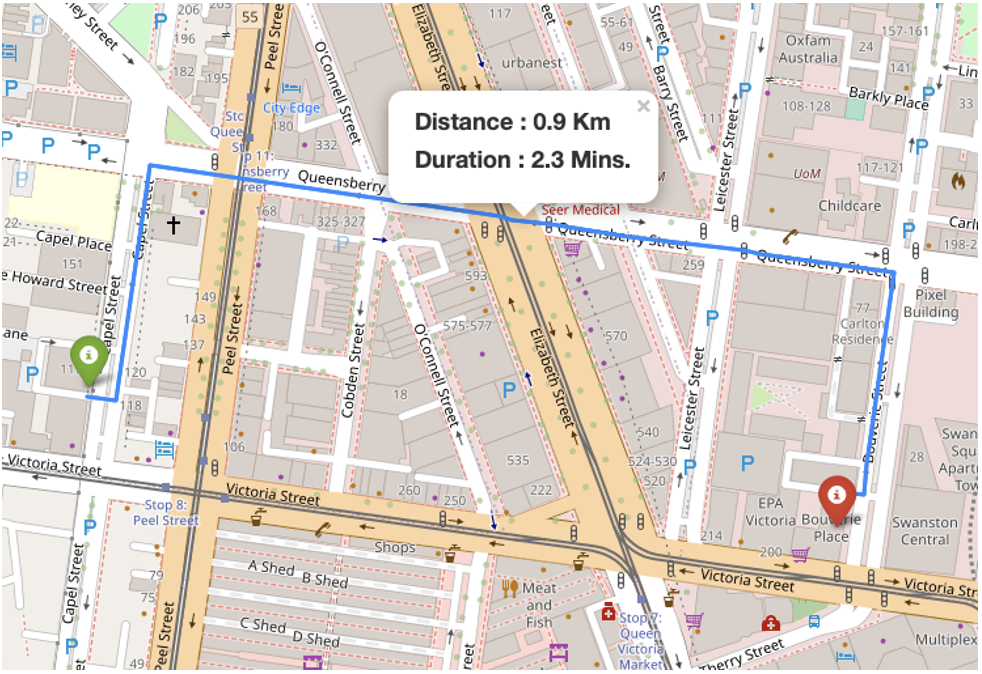

In [10]:
Image(filename='../plots/foliumMap_SchoolAPIPresentation_2.png') 

The information needed to be preprocessed first by using the notebook `notebooks/Prepare_distance_to_nowProperty.ipynb`    
and the notebook `notebooks/Prepare_distance_to_historicalProperty.ipynb` .   
Saving to file `data/curated` , called `historical_property.csv` and `new_property.csv`.  

### After get the information needed from the Open Route Service API

In [11]:
# All needed information would be stored into csv file
# This is the historical data
historical_property = pd.read_csv("../data/curated/historical_property.csv")

historical_property = historical_property.drop(columns = ["Unnamed: 0"])

historical_property.head(1)

,name,latitude,longitude,nearestSchool,nearestSchool_distance,nearestStation,nearestStation_distance,School_Y,School_X,School_Name,STOP_ID,LATITUDE,LONGITUDE,STOP_NAME,real_school_distance,real_school_duration,real_station_distance,real_station_duration
0,"609/1 BOUVERIE STREET, CARLTON SOUTH",-37.8061,144.96122,River Nile School,0.5492,Melbourne Central Railway Station (Melbourne C...,0.4389,-37.80519,144.95509,River Nile School,19842,-37.8099,144.9626,Melbourne Central Railway Station (Melbourne C...,0.9,2.3,1.3,2.7


In [12]:
# This is the property data of this year
new_property = pd.read_csv("../data/curated/new_property.csv")

new_property = new_property.drop(columns = ["Unnamed: 0"])

new_property.head(1)

,name,coordinates,nearestSchool,nearestSchool_distance,nearestStation,nearestStation_distance,School_Y,School_X,School_Name,STOP_ID,LATITUDE,LONGITUDE,STOP_NAME,real_school_distance,real_school_duration,real_station_distance,real_station_duration
0,101/25-33 Wills Street Melbourne VIC 3000,"[-37.8107757, 144.9569269]",Ozford College,0.3222,Flagstaff Railway Station (Melbourne City),0.1736,-37.81289,144.95442,Ozford College,19841,-37.812,144.9557,Flagstaff Railway Station (Melbourne City),0.7,1.7,0.5,1.2


### The Last four columns is the data get from the Open Route Service API, would be used for the later process

## Predict Income and population
We cannot find future data for both income and population. Therefore, for income prediction, we find the previous income data from 2010-2015, we assume the income is increasing linearly. 
For population prediction, we found official forecasts for Year 2026, 2031 and 2036.
Based on the forecasts, we also used linear regression to do the prediction for remaining years. For Year 2026, 2031 and 2036, we simply use the prediction from official forecasts.


## Data merge by SA2 region
We choose to merge dataset base on SA2 region. We have also created a data frame for SA2 region which including the postcodes for each region. 


## Feature selection 



## Prediction
We choose to create our model based on the features from 2017-2022. The merged Data from 2017-2021 will used to train the model. To calculate the model accuracy, Eighty percent of rental prices from 2022 will be the Y train and the remaining data from 2022 will be the Y test.m

## Three big Question
1. What are the most important internal and external features in predicting rental prices?
    Using the feature selection method, to see which feature is more correlated to the week rent. 
    -random forest to do the feature selection and producing an ranking about the importance of features. The following code would generate the overview of the feature importance

In [13]:
# loading the importance image which generated by random forest
# 放一下回答这道题的图片
Image(filename='../plots/回答这道题的图片.png') 

FileNotFoundError: [Errno 2] No such file or directory: '../plots/回答这道题的图片.png'

2. What are the top 10 suburbs with the highest predicted growth rate?
    After we predicting the rental prices, then we groupby the data using the sa2 region with the average rental prices.
    Comparing the growth rate of the prices from 2017-2025, we finding the top 10 highest growth rate region, and we find their population, income are all keep increasing, and half of their property type are house.

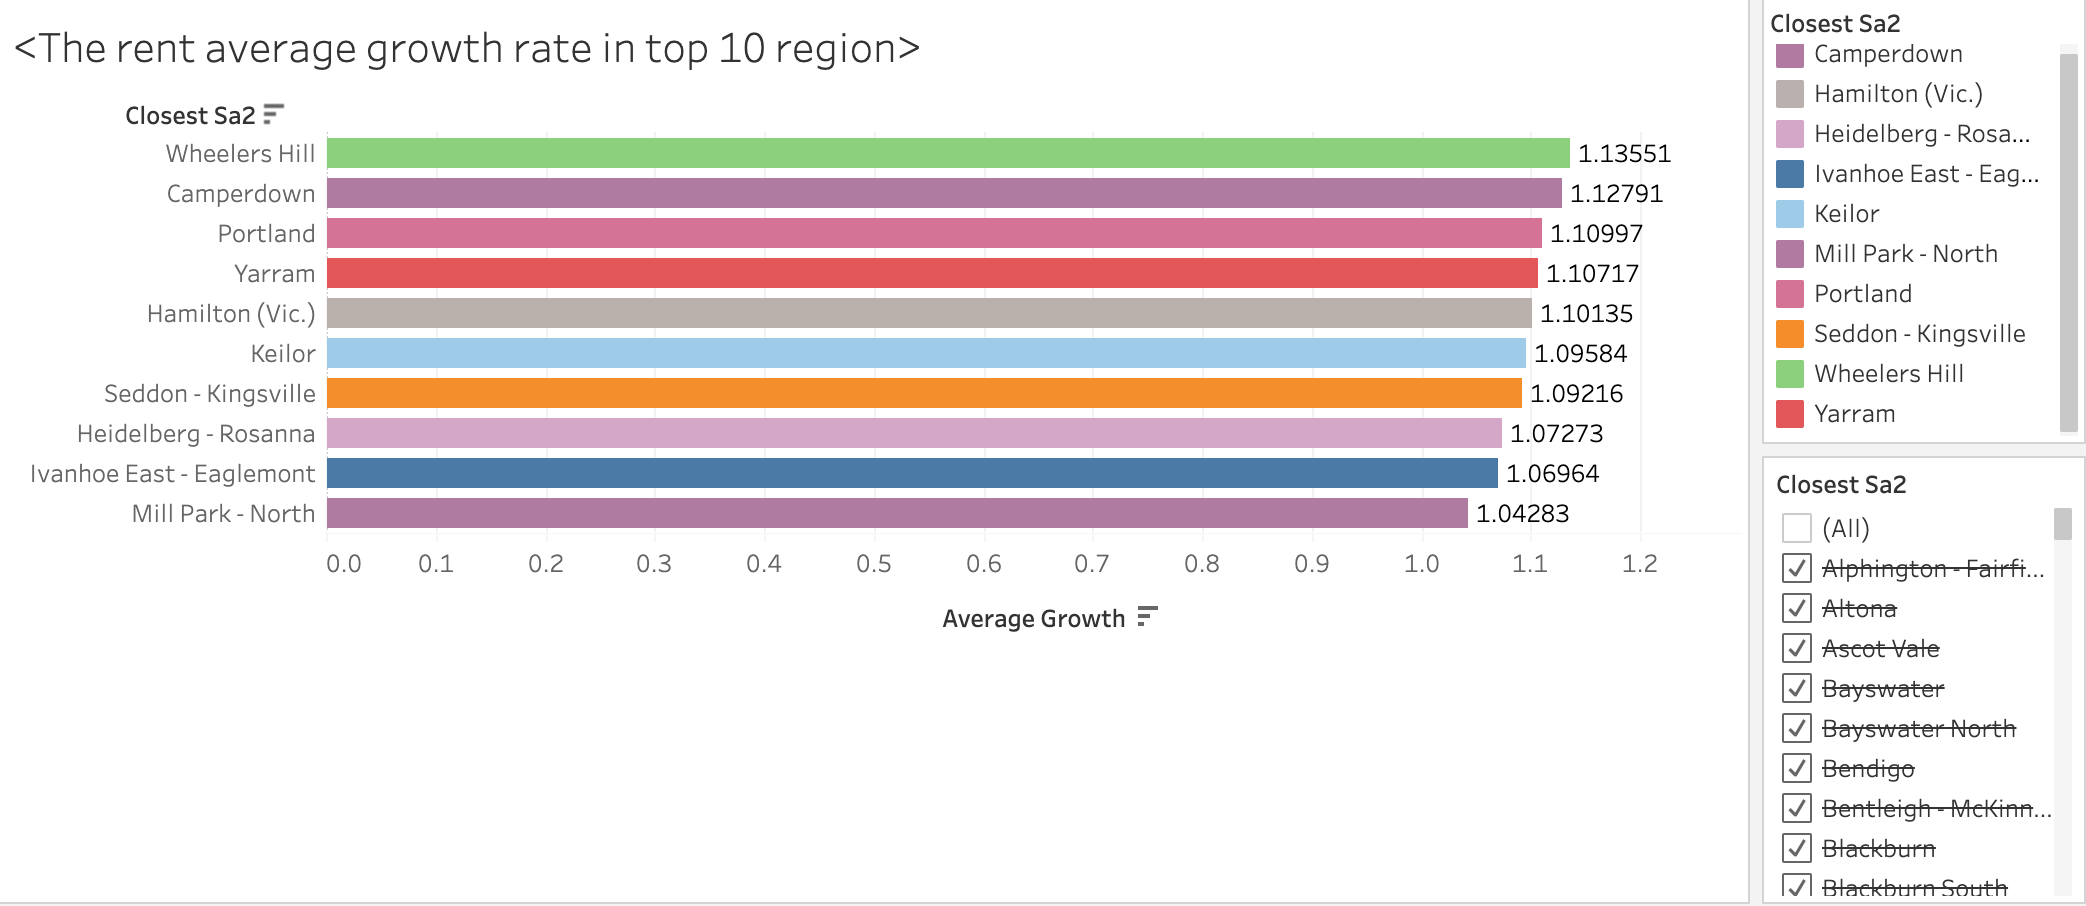

In [ ]:

Image(filename='../plots/growth_rate_top10.png') 

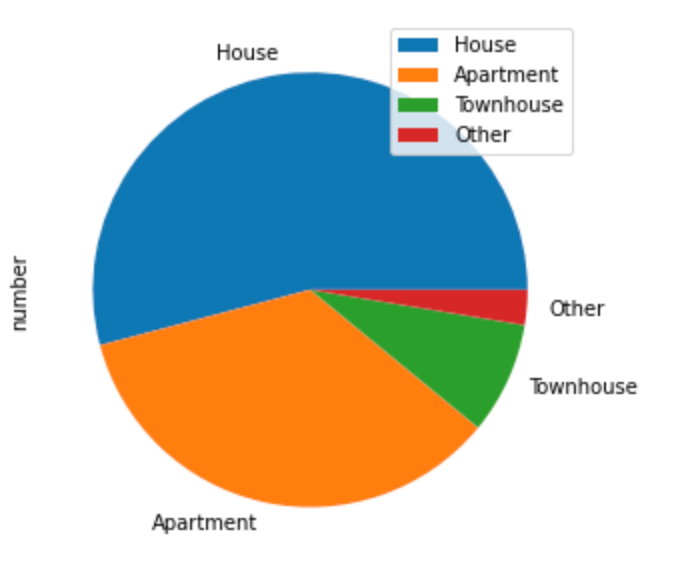

In [ ]:
Image(filename='../plots/property_type_top10.png') 

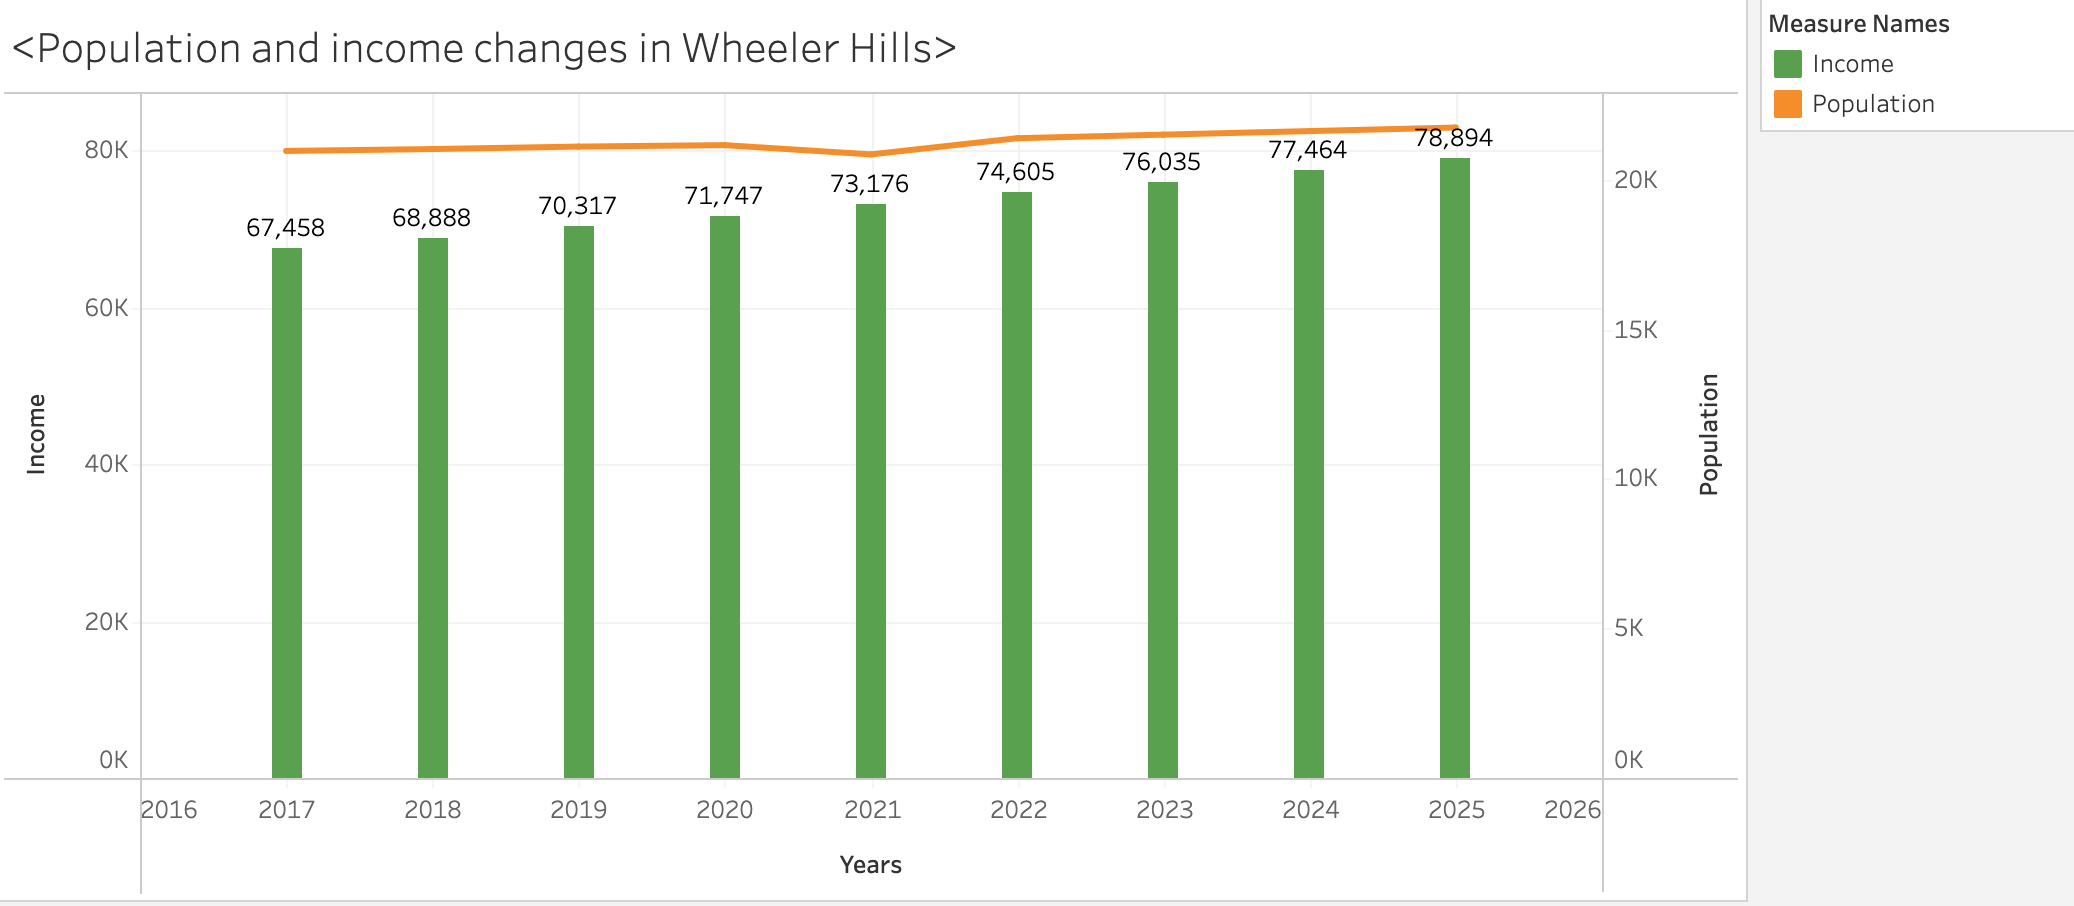

In [ ]:
Image(filename='../plots/income_pop_wheeler_hills.png') 

3. What are the most liveable and affordable suburbs according to your chosen metrics?
    -livable Relatively high: there are more schools or hospitals or trains in the area, and more houses can be rented per capita (population/number of houses),murder rate,hospital, public spaces 
    -affordable: Income, distance to school

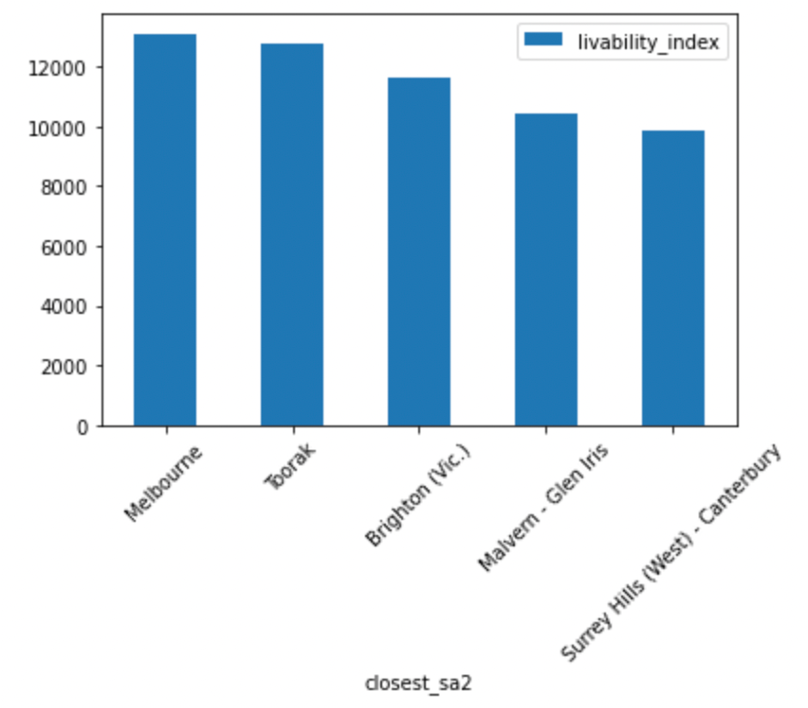

In [15]:
# Loading the result of the part 3
Image(filename='../plots/live_rate.png') 